In [1]:
## struct0 is the CNN structure used by the paper.
## dataset100sr_10tau is the dataset used.

In [2]:
# Import dependencies
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, utils, activations
from tensorflow.keras import optimizers, losses, metrics, preprocessing

In [3]:
# Change these variables for different datasets
dataset_directory = os.getcwd() + os.sep + "dataset_500sr_30tau"
chart_title = "PQD CNN - struct0 - dataset500sr_30tau"
model_title = "pqd_cnn_struct0_dataset500sr_30tau_model.h5"

In [4]:
# Import the training dataset
training_dataset = preprocessing.image_dataset_from_directory(
    directory=dataset_directory + "/training_set",
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(200, 200)
)

# Import the validation dataset
validation_dataset = preprocessing.image_dataset_from_directory(
    directory=dataset_directory + "/validation_set",
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(200, 200)
)

# Import the testing dataset
testing_dataset = preprocessing.image_dataset_from_directory(
    directory=dataset_directory + "/testing_set",
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(200, 200)
)

Found 6000 files belonging to 10 classes.
Found 2000 files belonging to 10 classes.
Found 2000 files belonging to 10 classes.


2022-07-29 16:49:56.719508: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-29 16:49:56.720144: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Build the CNN model - struct0
cnn = models.Sequential()
# Add first convolution layer
cnn.add(layers.Conv2D(
    filters=32, 
    kernel_size=(5, 5), 
    padding='valid', 
    activation='relu', 
    input_shape=(200, 200, 1)
    )
)
cnn.add(layers.AvgPool2D(
    pool_size=(2, 2)
    )
)
# Add second convolution layer
cnn.add(layers.Conv2D(
    filters=48, 
    kernel_size=(3, 3), 
    padding='valid',
    activation='relu'
    )
)
cnn.add(layers.AvgPool2D(
    pool_size=(2, 2)
    )
)
# Add final convolution layer
cnn.add(layers.Conv2D(
    filters=64, 
    kernel_size=(3, 3), 
    padding='valid',
    activation='relu'
    )
)
# Add fully-connected layer
cnn.add(layers.Flatten())
cnn.add(layers.Dense(
    units=10,
    activation='softmax'
    )
)

In [6]:
# Show the structure of the CNN
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 196, 196, 32)      832       
_________________________________________________________________
average_pooling2d (AveragePo (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 48)        13872     
_________________________________________________________________
average_pooling2d_1 (Average (None, 48, 48, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        27712     
_________________________________________________________________
flatten (Flatten)            (None, 135424)            0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [7]:
# Configure the CNN for training
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
# Train the CNN for 10 epochs with the training dataset
# Validate the CNN with the validation dataset
history = cnn.fit(
    training_dataset,
    epochs=10,
    validation_data=validation_dataset
)

Epoch 1/10


2022-07-29 16:49:57.282195: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


188/188 [==============================] - 125s 660ms/step - loss: 26.1931 - accuracy: 0.6916 - val_loss: 0.0686 - val_accuracy: 0.9720
Epoch 2/10
188/188 [==============================] - 122s 647ms/step - loss: 0.0626 - accuracy: 0.9758 - val_loss: 0.0882 - val_accuracy: 0.9650
Epoch 3/10
188/188 [==============================] - 124s 657ms/step - loss: 0.0648 - accuracy: 0.9767 - val_loss: 0.0927 - val_accuracy: 0.9700
Epoch 4/10
188/188 [==============================] - 121s 642ms/step - loss: 0.0944 - accuracy: 0.9706 - val_loss: 0.0910 - val_accuracy: 0.9615
Epoch 5/10
188/188 [==============================] - 122s 648ms/step - loss: 0.0583 - accuracy: 0.9786 - val_loss: 0.1137 - val_accuracy: 0.9695
Epoch 6/10
188/188 [==============================] - 124s 659ms/step - loss: 0.0607 - accuracy: 0.9767 - val_loss: 0.0952 - val_accuracy: 0.9595
Epoch 7/10
188/188 [==============================] - 121s 644ms/step - loss: 0.0515 - accuracy: 0.9788 - val_loss: 0.0799 - val_accur

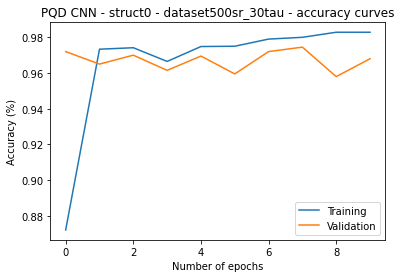

In [9]:
# Plot the training and validation accuracy of the CNN
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(chart_title + " - accuracy curves")
plt.ylabel('Accuracy (%)')
plt.xlabel('Number of epochs')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

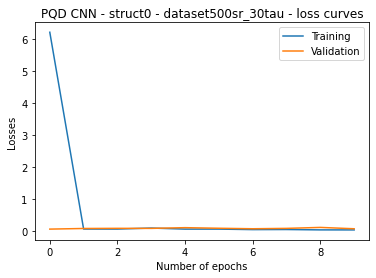

In [10]:
# Plot the training and validation loss levels of the CNN
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(chart_title + " - loss curves")
plt.ylabel('Losses')
plt.xlabel('Number of epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [11]:
# Evaluate the CNN with the testing dataset
results = cnn.evaluate(
    testing_dataset
)

63/63 [==============================] - 12s 194ms/step - loss: 0.0653 - accuracy: 0.9715


In [12]:
# Save the trained model
if not os.path.exists(os.getcwd() + os.sep + "saved_models"):
    os.mkdir(os.getcwd() + os.sep + "saved_models")
cnn.save(os.getcwd() + os.sep + "saved_models" + os.sep + model_title)